# Case Study Master Data Science DS3 – Part II

#Moritz Vinzent Seiler, M. Sc.

#Rohan Francis Pinto¶


Train a Deep Neural Network on the given Dataset. Note, that the test-folder is for later use! 20% of the given images should be used for validation to avoid overfitting
Hint: this task is very similar to the Linnaeus-Dataset. Feel free to use that notebook as an initial starting point.

In [1]:
#importing all the required packages

import numpy as np
import random

import PIL
import PIL.Image

import os
import pathlib

from tensorflow.keras import models, layers, Input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#checking for the path
import os
current_path = os.getcwd()
current_path

'/Users/rohanpinto/tensorflow-test'

In [3]:
# creating class labels from the data set
class_labels = ["Residential","AnnualCrop","Highway","River","HerbaceousVegetation"]

In [5]:
# Creating the trainining data set and validation set
train_set1 = image_dataset_from_directory('/Users/rohanpinto/Desktop/sat_data/Train/', 
                                         labels='inferred', class_names=class_labels,
                                         label_mode='categorical', image_size=(32,32), 
                                         shuffle=True, seed=123,batch_size=16, validation_split=0.20, 
                                         subset="training")


validation_set = image_dataset_from_directory('/Users/rohanpinto/Desktop/sat_data/Train/', 
                                         labels='inferred', class_names=class_labels,
                                         label_mode='categorical', image_size=(32,32), 
                                         shuffle=True, seed=123,batch_size=16, validation_split=0.20, 
                                         subset="validation")


Found 10000 files belonging to 5 classes.
Using 8000 files for training.
Metal device set to: Apple M1


2023-06-04 02:17:21.247587: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-04 02:17:21.247946: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 10000 files belonging to 5 classes.
Using 2000 files for validation.


In [6]:
# importing the test data set
test_set = image_dataset_from_directory('/Users/rohanpinto/Desktop/sat_data/test/', batch_size=16, 
                                        image_size=(32,32),
                                        label_mode='categorical', shuffle=False, seed=None)


Found 2000 files belonging to 1 classes.


In [7]:
#Finding the file path
data = train_set1.file_paths

In [8]:
val = validation_set.class_names
val

['Residential', 'AnnualCrop', 'Highway', 'River', 'HerbaceousVegetation']

In [9]:
data[1]

'/Users/rohanpinto/Desktop/sat_data/Train/AnnualCrop/00445.jpg'

In [10]:
class_names = train_set1.class_names
class_names

['Residential', 'AnnualCrop', 'Highway', 'River', 'HerbaceousVegetation']

2023-06-04 02:17:29.586804: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


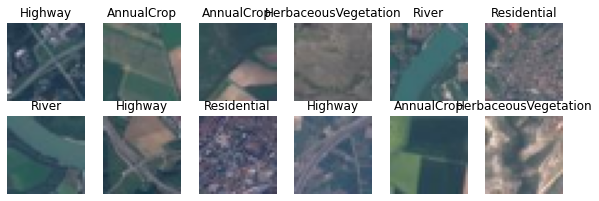

In [11]:
# Visualizing the images from the training dataset
class_names = train_set1.class_names

### To visualize the images
plt.figure(figsize=(10, 10))
for images, labels in train_set1.take(1):
      for i in range(12):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

# Plotting the images
plt.show()

In [12]:
#CNN Model 1
#param is calculated using formula {RGB 3 * kernel size (height 3)*width 3} * filter 8
model = models.Sequential()
model.add(Input(shape=(32,32,3)))
model.add(layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu',padding = 'same'))
model.add(layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu',padding = 'same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding = 'same'))

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu',padding = 'same'))
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu',padding = 'same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding = 'same'))

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding = 'same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding = 'same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding = 'same'))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding = 'same'))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding = 'same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding = 'same'))

model.add(layers.Flatten())

model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=5, activation = 'softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 8)         584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                    

In [14]:
# Categorical Crossentropy as Loss-Function and SGD as the optimizer
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train the model by using fit
history = model.fit(
    train_set1,                  # 80% of train data
    validation_data=validation_set,   # 20% of train data
    epochs=25, 
    batch_size=16,
    verbose=1, 
    use_multiprocessing=True
)

Epoch 1/25


2023-06-04 02:17:38.499934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


499/500 [============================>.] - ETA: 0s - loss: 1.4928 - accuracy: 0.3511

2023-06-04 02:17:48.326501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


500/500 [==============================] - 12s 23ms/step - loss: 1.4923 - accuracy: 0.3511 - val_loss: 1.2305 - val_accuracy: 0.4895
Epoch 2/25
500/500 [==============================] - 11s 22ms/step - loss: 1.3895 - accuracy: 0.4181 - val_loss: 1.2381 - val_accuracy: 0.5040
Epoch 3/25
500/500 [==============================] - 11s 22ms/step - loss: 1.2321 - accuracy: 0.4986 - val_loss: 1.2209 - val_accuracy: 0.4725
Epoch 4/25
500/500 [==============================] - 10s 21ms/step - loss: 1.0960 - accuracy: 0.5738 - val_loss: 0.9388 - val_accuracy: 0.6290
Epoch 5/25
500/500 [==============================] - 8s 16ms/step - loss: 0.9841 - accuracy: 0.6203 - val_loss: 0.8513 - val_accuracy: 0.6685
Epoch 6/25
500/500 [==============================] - 8s 16ms/step - loss: 0.8922 - accuracy: 0.6524 - val_loss: 0.8154 - val_accuracy: 0.6765
Epoch 7/25
500/500 [==============================] - 10s 19ms/step - loss: 0.8303 - accuracy: 0.6823 - val_loss: 0.8918 - val_accuracy: 0.6360
Epoch

Text(0, 0.5, 'Accuracy')

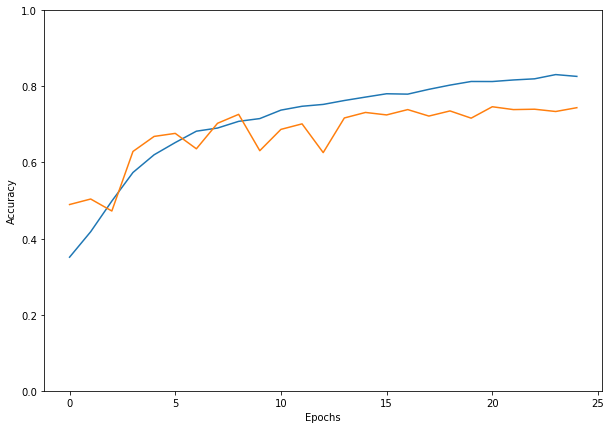

In [16]:
#Accuracy plot for epochs
x = np.arange(len(history.history['loss']))
plt.figure(figsize=(10,7))
plt.plot(x, history.history['accuracy'])
plt.plot(x, history.history['val_accuracy'])
plt.ylim(0, 1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [17]:
#CNN Model 2
model2 = models.Sequential()
model2.add(Input(shape=(32, 32, 3)))
model2.add(layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model2.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model2.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model2.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model2.add(layers.GlobalAveragePooling2D())

model2.add(layers.Dense(units=64, activation='relu'))
model2.add(layers.Dense(units=32, activation='relu'))
model2.add(layers.Dense(units=5, activation='softmax'))


In [18]:
# Categorical Crossentropy as Loss-Function and SGD as the optimizer
model2.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Train the model by using fit
Training_model2 = model2.fit(
    train_set1,                  # 80% of train data
    validation_data=validation_set,   # 20% of train data
    epochs=25, 
    batch_size=16,
    verbose=1, 
    use_multiprocessing=True
)

Epoch 1/25


2023-06-04 02:22:09.981312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


497/500 [============================>.] - ETA: 0s - loss: 1.4428 - accuracy: 0.3809

2023-06-04 02:22:19.879356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


500/500 [==============================] - 11s 21ms/step - loss: 1.4425 - accuracy: 0.3810 - val_loss: 1.3658 - val_accuracy: 0.3680
Epoch 2/25
500/500 [==============================] - 9s 18ms/step - loss: 1.2801 - accuracy: 0.4724 - val_loss: 1.1872 - val_accuracy: 0.5090
Epoch 3/25
500/500 [==============================] - 8s 15ms/step - loss: 1.1505 - accuracy: 0.5325 - val_loss: 1.0106 - val_accuracy: 0.6320
Epoch 4/25
500/500 [==============================] - 10s 20ms/step - loss: 1.0471 - accuracy: 0.5943 - val_loss: 1.0078 - val_accuracy: 0.6045
Epoch 5/25
500/500 [==============================] - 13s 26ms/step - loss: 0.9608 - accuracy: 0.6335 - val_loss: 0.8051 - val_accuracy: 0.6860
Epoch 6/25
500/500 [==============================] - 8s 17ms/step - loss: 0.8713 - accuracy: 0.6659 - val_loss: 1.5404 - val_accuracy: 0.4825
Epoch 7/25
500/500 [==============================] - 9s 18ms/step - loss: 0.8268 - accuracy: 0.6855 - val_loss: 0.7249 - val_accuracy: 0.7055
Epoch 8

Text(0, 0.5, 'Accuracy')

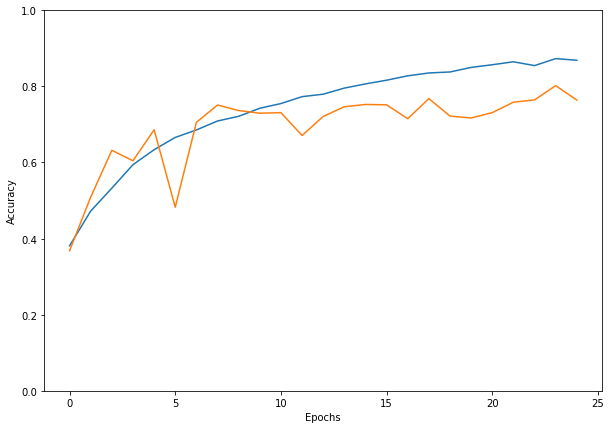

In [20]:
#Accuracy plot for epochs

x2 = np.arange(len(Training_model2.history['loss']))
plt.figure(figsize=(10,7))
plt.plot(x2, Training_model2.history['accuracy'])
plt.plot(x2, Training_model2.history['val_accuracy'])
plt.ylim(0, 1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [24]:
# CNN model 3
model3 = models.Sequential()
model3.add(Input(shape=(32, 32, 3)))
model3.add(layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model3.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation=None))
model3.add(layers.BatchNormalization())
model3.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model3.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation=None))
model3.add(layers.BatchNormalization())         
model3.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model3.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model3.add(layers.GlobalAveragePooling2D())
model3.add(layers.Dense(units=64, activation='relu'))
model3.add(layers.Dense(units=32, activation='relu'))
model3.add(layers.Dense(units=5, activation='softmax'))


In [25]:
# Categorical Crossentropy as Loss-Function and SGD as the optimizer

model3.compile(optimizer='SGD',
               loss='categorical_crossentropy',
               metrics=['accuracy'])



In [26]:
#Training the model
training_model3 = model3.fit(
    train_set1,
    validation_data=validation_set,
    epochs=25,
    batch_size=16,
    verbose=1,
    use_multiprocessing=True
)

Epoch 1/25


2023-06-04 02:36:07.154376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


499/500 [============================>.] - ETA: 0s - loss: 1.2143 - accuracy: 0.4974

2023-06-04 02:36:19.358657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


500/500 [==============================] - 15s 27ms/step - loss: 1.2143 - accuracy: 0.4973 - val_loss: 1.8095 - val_accuracy: 0.4215
Epoch 2/25
500/500 [==============================] - 10s 19ms/step - loss: 0.8796 - accuracy: 0.6465 - val_loss: 1.1619 - val_accuracy: 0.5055
Epoch 3/25
500/500 [==============================] - 10s 21ms/step - loss: 0.7938 - accuracy: 0.6845 - val_loss: 0.7606 - val_accuracy: 0.6790
Epoch 4/25
500/500 [==============================] - 15s 30ms/step - loss: 0.7137 - accuracy: 0.7196 - val_loss: 1.4599 - val_accuracy: 0.4580
Epoch 5/25
500/500 [==============================] - 12s 23ms/step - loss: 0.6621 - accuracy: 0.7414 - val_loss: 3.1899 - val_accuracy: 0.2530
Epoch 6/25
500/500 [==============================] - 9s 19ms/step - loss: 0.6114 - accuracy: 0.7631 - val_loss: 0.8610 - val_accuracy: 0.6670
Epoch 7/25
500/500 [==============================] - 8s 16ms/step - loss: 0.5702 - accuracy: 0.7833 - val_loss: 1.1207 - val_accuracy: 0.6050
Epoch

In [ ]:
### Since the accuracy and the validation accuracy is highest among all the three models,
# ... training model 3 is considered for the test data

Text(0, 0.5, 'Accuracy')

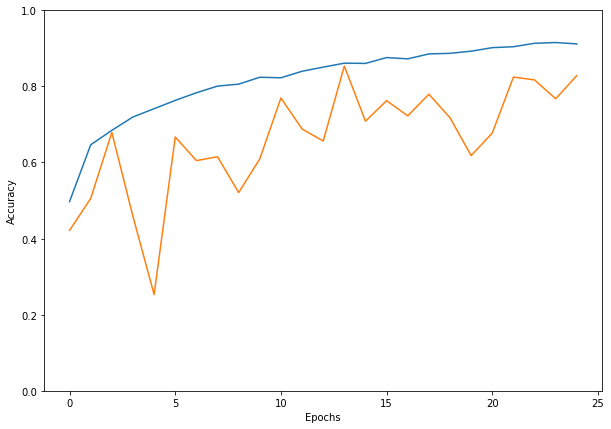

In [27]:
# Accuracy plot
x3 = np.arange(len(training_model3.history['loss']))
plt.figure(figsize=(10,7))
plt.plot(x3, training_model3.history['accuracy'])
plt.plot(x3, training_model3.history['val_accuracy'])
plt.ylim(0, 1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [29]:
#Predicting on the test data set
labels_predicted = model3.predict(test_set)
pred_classes = [np.argmax(element) for element in labels_predicted]
pred_classes[:5]

2023-06-04 02:45:38.787524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[3, 2, 3, 3, 2]

In [30]:
#predicted class labels
predicted_class_label = [class_names[i] for i in pred_classes]
predicted_class_label[:5]

['River', 'Highway', 'River', 'River', 'Highway']

In [31]:
# fetching the file name of the test dataset
data = test_set.file_paths

In [32]:
import pandas as pd
df = pd.DataFrame(data,columns = ['file_path'])
df['img_name'] = df['file_path'].str.split('/').str.get(7)
df = df.iloc[:,1:]

In [33]:
#adding the predicted class labels to the dataframe
df['class_label'] = predicted_class_label
df

,img_name,class_label
0,00000.jpg,River
1,00001.jpg,Highway
2,00002.jpg,River
3,00003.jpg,River
4,00004.jpg,Highway
...,...,...
1995,01995.jpg,Residential
1996,01996.jpg,Residential
1997,01997.jpg,Residential
1998,01998.jpg,River


In [34]:
#saving the file in csv format
df.to_csv(r'/Users/rohanpinto/Desktop/sat_data/result_file.csv', index=False)

In [36]:
pd.read_csv('/Users/rohanpinto/Desktop/sat_data/result_file.csv')

,img_name,class_label
0,00000.jpg,River
1,00001.jpg,Highway
2,00002.jpg,River
3,00003.jpg,River
4,00004.jpg,Highway
...,...,...
1995,01995.jpg,Residential
1996,01996.jpg,Residential
1997,01997.jpg,Residential
1998,01998.jpg,River


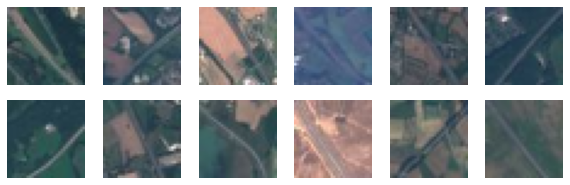

In [37]:
### To visualize the images
plt.figure(figsize=(10, 10))
for images, labels in test_set.take(1):
      for i in range(12):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

# Plotting the images
plt.show()